In [4]:
import sys
import os
# import pyagnps

In [9]:
import socket

socket.getfqdn()

'Luc-NCCHE-XPS.nat.olemiss.edu'

In [11]:
'True' == True

False

In [7]:
from pyagnps.utils import log_to_file

log_to_file("bonjour.log", "bonjour")

In [7]:
import geopandas as gpd
import json
from pathlib import Path

from sqlalchemy import create_engine, URL

In [3]:
gdf = gpd.read_file("../inputs/climate/NLDAS2_GRID_CENTROIDS_epsg4326.gpkg")

In [12]:
gdf = gdf.rename(columns={"nldas2_grid_ID": "station_id"})

In [13]:
gdf

,station_id,geometry
0,103473,POINT (-124.93750 52.93750)
1,103474,POINT (-124.81250 52.93750)
2,103475,POINT (-124.68750 52.93750)
3,103476,POINT (-124.56250 52.93750)
4,103477,POINT (-124.43750 52.93750)
...,...,...
103931,460,POINT (-67.56250 25.06250)
103932,461,POINT (-67.43750 25.06250)
103933,462,POINT (-67.31250 25.06250)
103934,463,POINT (-67.18750 25.06250)


In [18]:
path_to_creds_menderes = Path("../inputs/db_credentials.json")

with open(path_to_creds_menderes, "r") as f:
    creds = json.load(f)


db_url = URL.create(
                "postgresql",
                username=creds['user'],
                password=creds['password'],
                host=creds['host'],
                port=creds['port'],
                database=creds['database']
                )


engine = create_engine(db_url)

In [19]:
# Populate database with table called "nldas2_grid_centroids" using to_postgis()

gdf.to_postgis("nldas2_grid_centroids", engine, if_exists="replace", index=False)

In [1]:
import pynldas2

ModuleNotFoundError: No module named 'numpy.core._exceptions'

In [2]:
import importlib
exceptions = importlib.import_module('numpy.core._exceptions')
UFuncTypeError = getattr(exceptions, 'UFuncTypeError')

ModuleNotFoundError: No module named 'numpy.core._exceptions'

In [10]:
import numpy

In [11]:
numpy.core._exceptions

C:\Users\Luc\AppData\Local\Temp\ipykernel_21880\2447954107.py:1: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core._exceptions.
  numpy.core._exceptions


<module 'numpy._core._exceptions' from 'c:\\Users\\Luc\\projects\\pyagnps\\.venv\\Lib\\site-packages\\numpy\\_core\\_exceptions.py'>

In [13]:
from numpy._core._exceptions import UFuncTypeError

In [12]:
import pynldas2

ModuleNotFoundError: No module named 'numpy.core._exceptions'

In [16]:
import datetime

In [17]:
datetime.date.fromisoformat

<function date.fromisoformat>

In [1]:
import xarray as xr

In [10]:
ds = xr.open_mfdataset(r"C:\Users\Luc\projects\pyagnps\inputs\climate\FORA_DAILY\*2020*.nc", concat_dim="time", combine="nested")

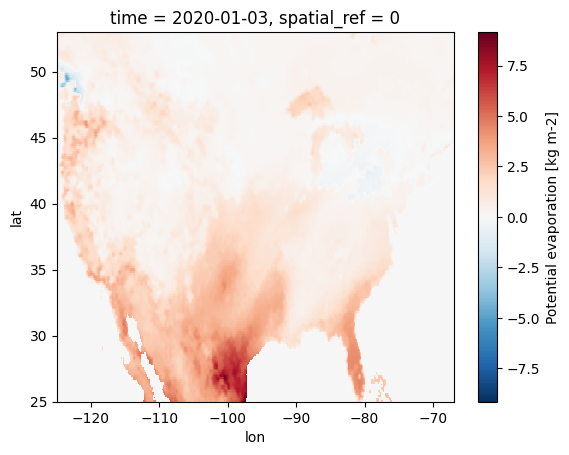

In [15]:
ds.isel(time=1).PotEvap.plot(x="lon", y="lat")